In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('train.csv')

In [4]:
#Quick data exploration
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#summary of numerical values
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#observation:
#data missing in LoanAmount,Loan_Amout_Term,Credit_History

'observation:\n'

In [9]:
#for non-numerical features
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [10]:
data['Credit_History'].unique()

array([  1.,   0.,  nan])

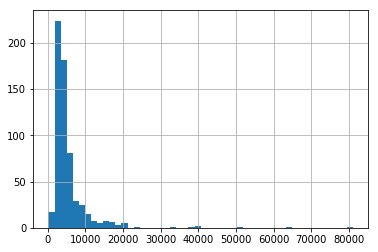

In [11]:
#Distribution Analysis
data['ApplicantIncome'].hist(bins=50)

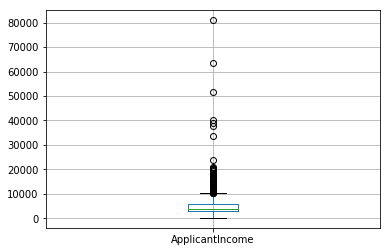

In [13]:
data.boxplot(column='ApplicantIncome')

/home/harshit/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


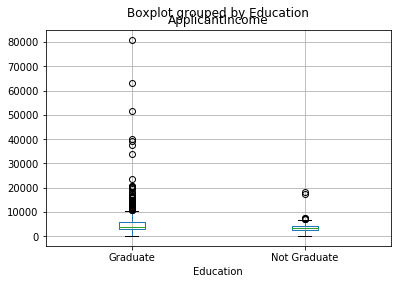

In [14]:
data.boxplot(column='ApplicantIncome',by='Education')

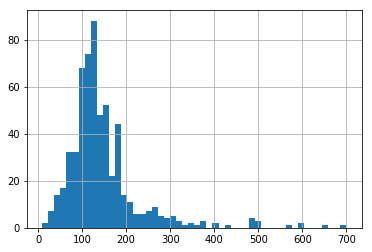

In [15]:
data['LoanAmount'].hist(bins=50)

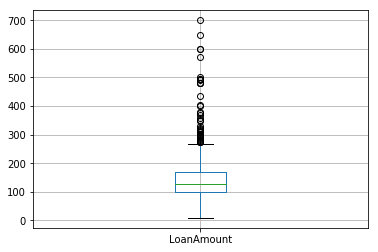

In [16]:
data.boxplot(column='LoanAmount')

In [19]:
#Categorical Variable Analysis
temp1 = data['Credit_History'].value_counts(ascending=True)
temp2 = data.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc = lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History')
print(temp1)

Frequency Table for Credit History
0.0     89
1.0    475
Name: Credit_History, dtype: int64


In [20]:
print('Probability of getting loan')
print(temp2)

Probability of getting loan
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


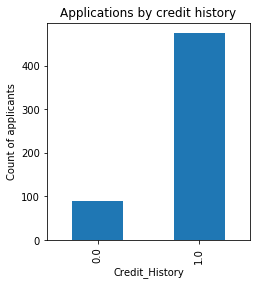

In [21]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(121)
ax.set_xlabel('Credit_History')
ax.set_ylabel('Count of applicants')
ax.set_title('Applications by credit history')
temp1.plot(kind='bar')

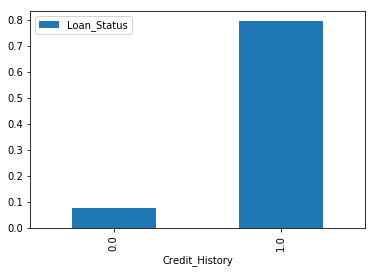

In [22]:
ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probabilty of getting loan')
ax2.set_title('Probability of getting loan by credit history')
temp2.plot(kind='bar')

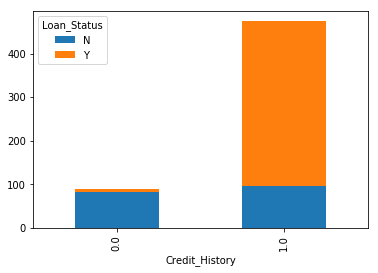

In [23]:
temp3 = pd.crosstab(data['Credit_History'],data['Loan_Status'])
temp3.plot(kind='bar',stacked=True,grid=False)